In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#import the dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['master.csv']))

KeyError: 'master.csv'

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
#Rename the columns head
df.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
#checking the data which is null misleading values
df.isna().sum()

,0
country,0
year,0
gender,0
age_group,0
suicide_count,0
population,0
suicide_rate,0
country-year,0
HDI_for_year,19456
gdp_for_year,0


In [ ]:
#remove the column HDI_for_year due to missing value about 70% of the data column
df.drop('HDI_for_year', axis=1, inplace=True)
df

,country,year,gender,age_group,suicide_count,population,suicide_rate,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  object 
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [ ]:
#remove the column which we have also other columns for both country and year
df.drop('country-year', axis=1, inplace=True)
df

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [ ]:
for gdp_for_year in df['gdp_for_year'].unique():
    print(gdp_for_year)

2,156,624,900
2,126,000,000
2,335,124,988
709,452,584
1,228,071,038
1,985,673,798
2,424,499,009
3,314,898,292
2,359,903,108
2,707,123,772
3,414,760,915
3,632,043,908
4,060,758,804
4,435,078,648
5,746,945,913
7,314,865,176
8,158,548,717
8,992,642,349
10,701,011,897
12,881,352,688
12,044,212,904
11,926,953,259
240,923,926
290,440,148
337,174,852
398,637,741
438,794,778
459,469,074
481,706,333
499,281,148
535,172,778
589,429,593
577,280,741
727,860,593
766,198,926
830,158,778
800,740,259
814,615,333
855,643,111
919,577,148
1,022,191,296
1,157,005,444
1,311,401,333
1,368,431,037
1,224,253,000
1,211,411,704
1,192,925,407
1,280,133,333
1,364,863,037
88,416,668,900
110,934,442,763
111,106,191,358
126,206,817,196
76,636,898,036
141,352,368,715
189,719,984,268
228,788,617,202
236,741,715,015
257,440,000,000
258,031,750,000
272,149,750,000
292,859,000,000
298,948,250,000
283,523,000,000
284,203,750,000
268,696,750,000
97,724,004,252
127,586,973,492
164,657,930,453
198,737,095,012
232,557,260,817

In [ ]:
#replace the type of data column from object to integer
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',', '').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   gdp_for_year    27820 non-null  int64  
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [ ]:
#checking for null and NAN data
df.isna().sum()

,0
country,0
year,0
gender,0
age_group,0
suicide_count,0
population,0
suicide_rate,0
gdp_for_year,0
gdp_per_capita,0
generation,0


In [ ]:
df.describe()

,year,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [ ]:
#max suicide committed
df[  df['suicide_count'] == df['suicide_count'].max()  ]

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,395077301248,2853,Boomers


In [ ]:
df['generation'].value_counts()

,count
generation,
Generation X,6408
Silent,6364
Millenials,5844
Boomers,4990
G.I. Generation,2744
Generation Z,1470


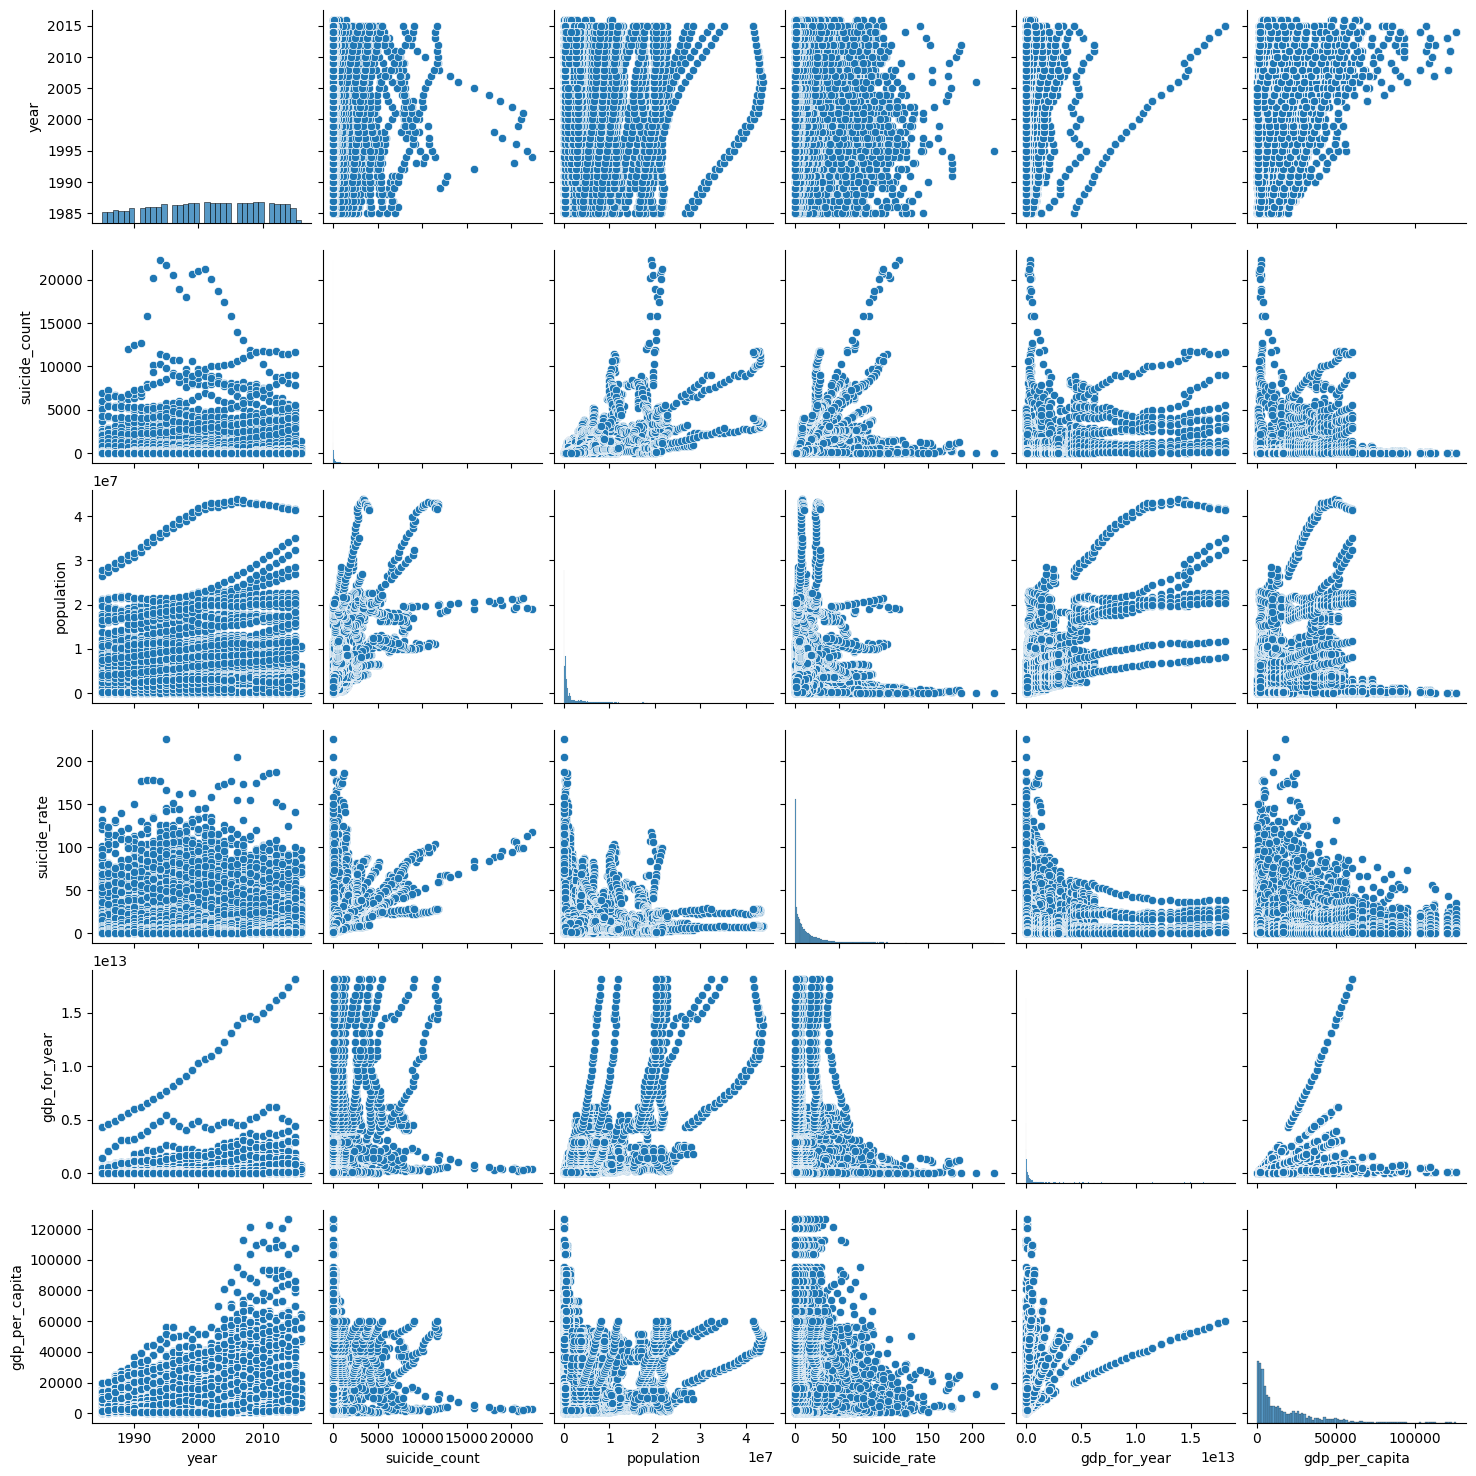

In [ ]:
#checking outlier
sns.pairplot(df)

<Axes: xlabel='generation', ylabel='suicide_count'>

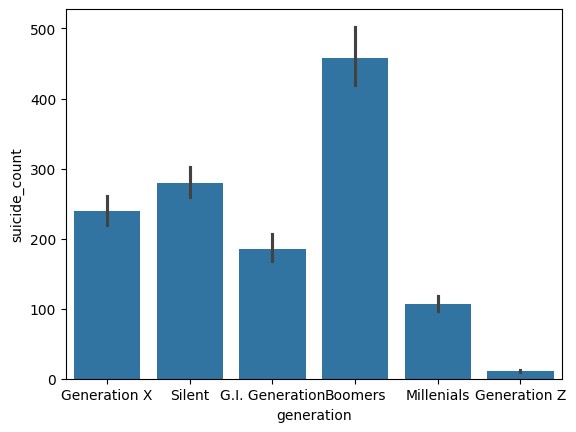

In [ ]:
#Suicide count for each generation
sns.barplot(x=df['generation'], y=df['suicide_count'])

In [ ]:
df.groupby('country').describe()['suicide_rate']

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Albania,264.0,3.502879,3.432047,0.00,0.3250,2.970,5.1000,18.88
Antigua and Barbuda,324.0,0.552901,3.386436,0.00,0.0000,0.000,0.0000,30.00
Argentina,372.0,10.469328,11.807477,0.24,3.1300,5.480,14.1325,63.01
Armenia,298.0,3.275872,3.806220,0.00,0.5200,1.780,4.9525,24.82
Aruba,168.0,9.503095,25.016613,0.00,0.0000,0.000,12.3575,224.97
...,...,...,...,...,...,...,...,...
United Arab Emirates,72.0,1.317917,1.529608,0.00,0.0000,1.160,2.0375,9.46
United Kingdom,372.0,7.502473,6.113924,0.00,2.8125,4.845,12.4075,23.99
United States,372.0,13.819812,13.229875,0.26,3.9725,6.890,23.3050,58.95


<Axes: xlabel='year'>

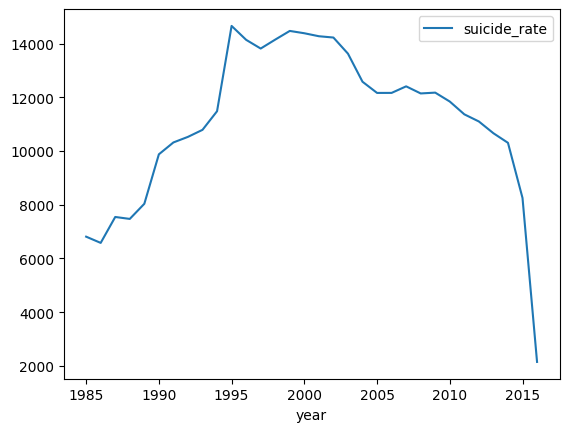

In [58]:
#suicide rate through 1985 t0 2015
df[['year','suicide_rate']].groupby(['year']).sum().plot()

#the most suicide rate tookpalce was in 1995 and then declined gradually untill 2025

<Axes: title={'center': 'Gender & Sucide Count grouped by Age group'}, xlabel='gender', ylabel='suicide_count'>

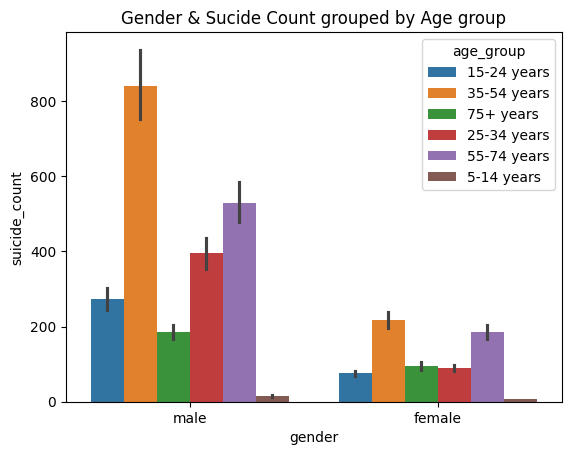

In [ ]:
#Gender & Sucide Count grouped by Age Group bar plot
plt.title('Gender & Sucide Count grouped by Age gro')
sns.barplot(x=df['gender'], y=df['suicide_count'], hue=df['age_group'])

#here the most group age committed sucicde are 35 to 54

(<Axes: xlabel='suicide_rate', ylabel='country'>,)

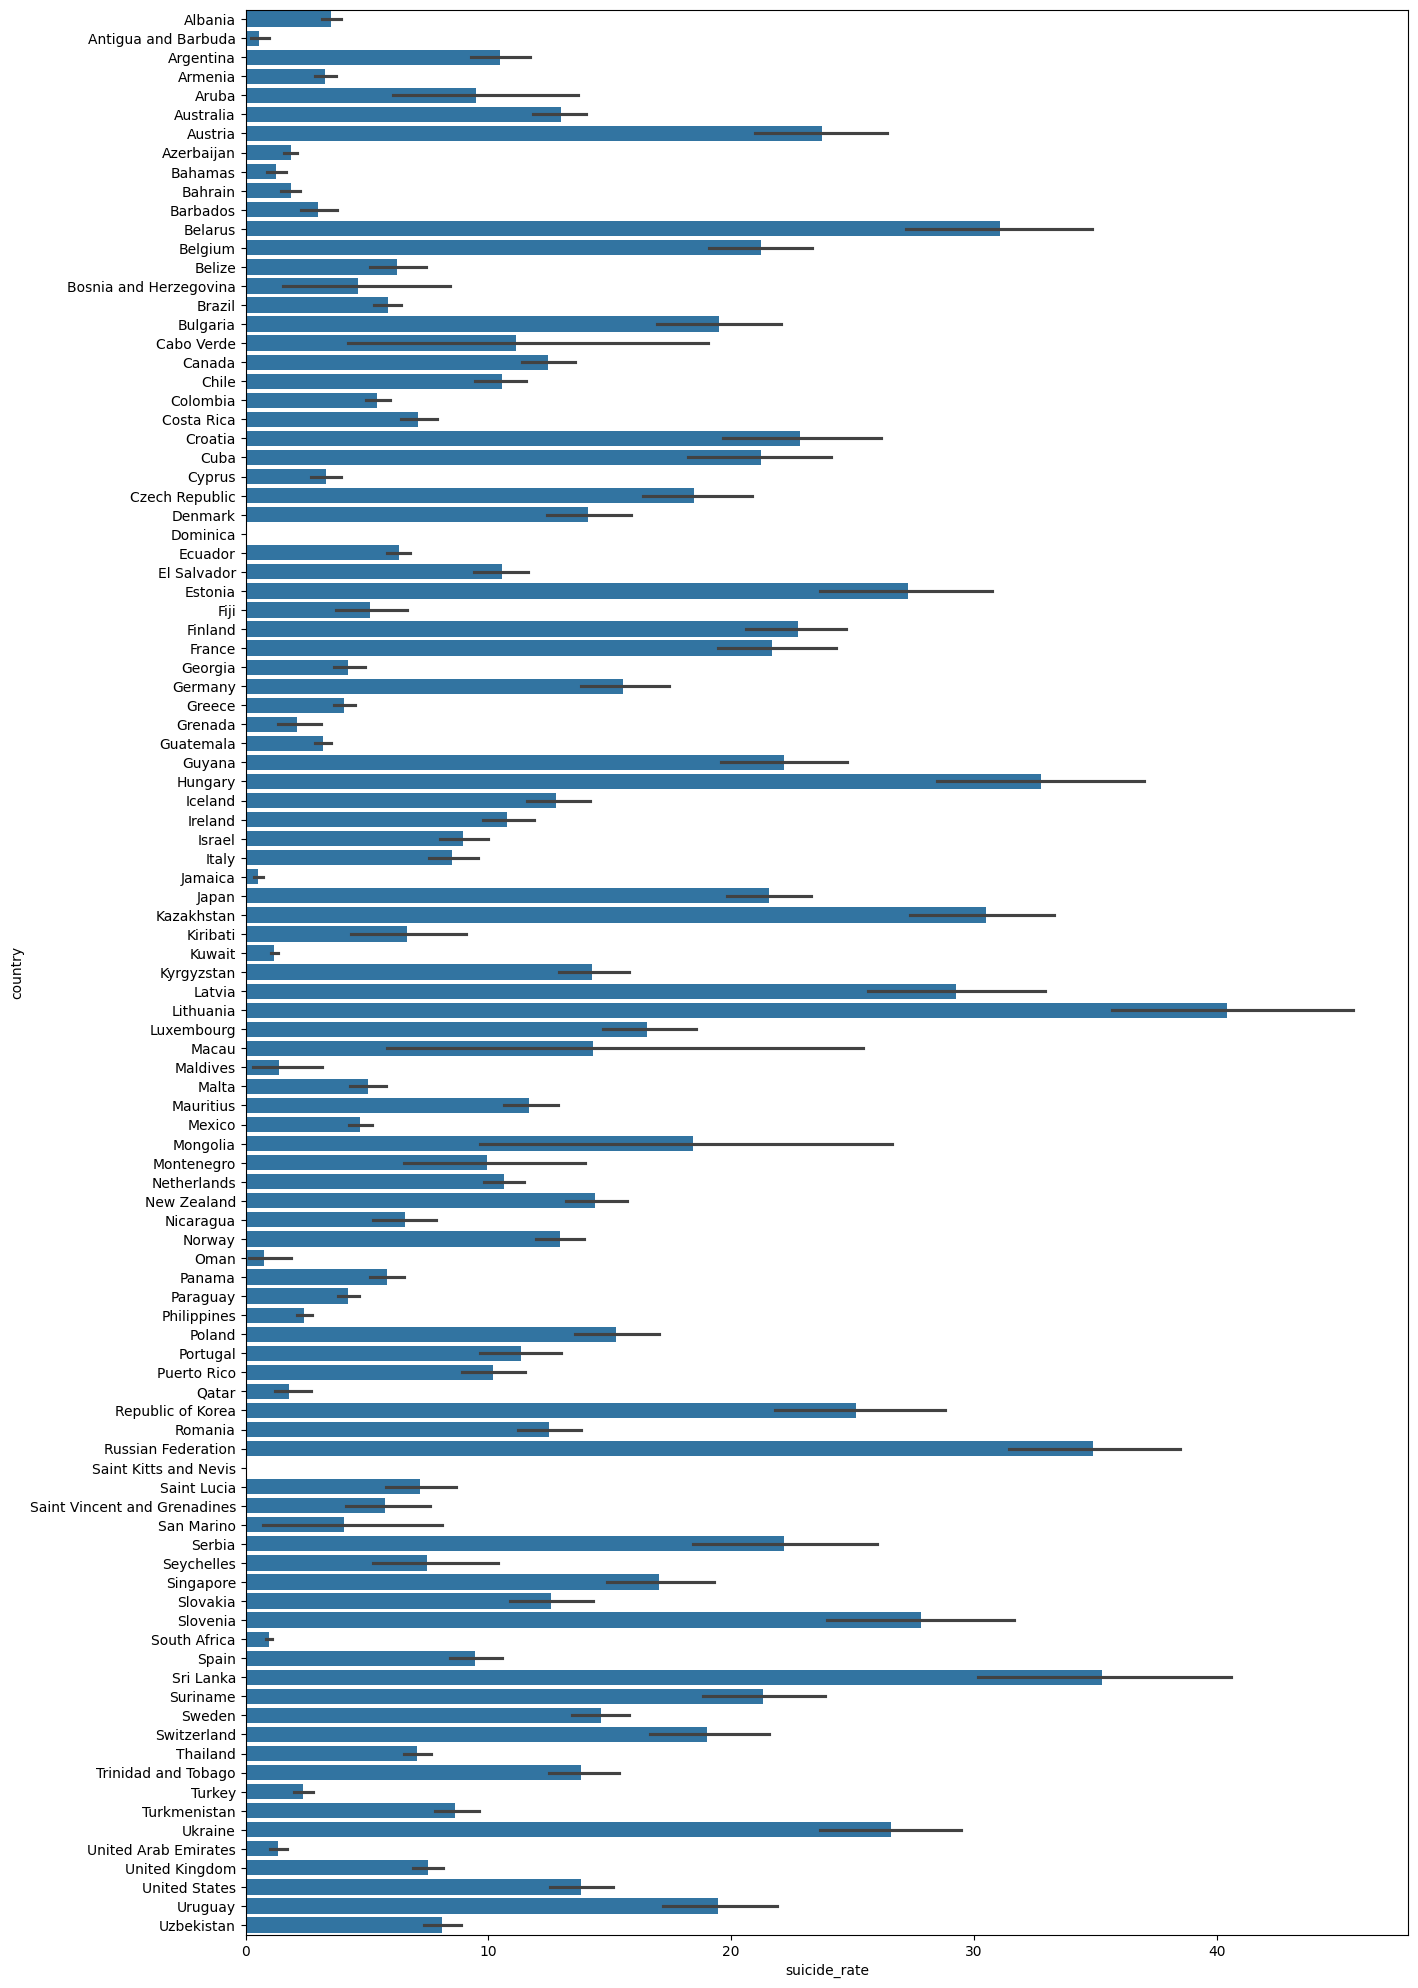

In [62]:
#Suicide rate for each country
plt.figure(figsize=(15,25))
sns.barplot(x =df['suicide_rate'], y =df['country']),

#most fo suicide committed in the eastern europe like russia and lithuania except for sri lanka which is spotted at asia continent